Chapter 29
# 极坐标视角看瑞利商
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import lambdify, diff, exp, latex, simplify,symbols,cos,sin,trigsimp

from matplotlib import cm
# 导入色谱模块

import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

In [2]:
p = plt.rcParams
p["font.sans-serif"] = ["Roboto"]
p["font.weight"] = "light"
p["ytick.minor.visible"] = False
p["xtick.minor.visible"] = False
p["axes.grid"] = True
p["grid.color"] = "0.5"
p["grid.linewidth"] = 0.5


In [3]:
def mesh(num = 100):
    # 偶数避免零点
    
    # number of mesh grids
    x_array = np.linspace(-2,2,num)
    y_array = np.linspace(-2,2,num)
    xx,yy = np.meshgrid(x_array,y_array)
    
    return xx, yy

In [4]:
theta, r = symbols('theta r')
# 自定义函数计算二元瑞利商
def Rayleigh_Q(Q, theta_array):
    
    x = np.array([[cos(theta) * r],
                  [sin(theta) * r]])
    
    # 瑞利商，符号式
    f_theta = x.T @ Q @ x/(x.T @ x)
    
    # 将符号函数表达式转换为Python函数
    f_theta_fcn = lambdify(theta,f_theta[0][0])
    
    # 计算二元函数函数值
    f_array = f_theta_fcn(theta_array)
    
    return f_array,trigsimp(f_theta[0][0])


In [5]:
def visualize(Q, title):
    
    theta_array = np.linspace(0, 2*np.pi, 100)
    f_array,f_x1x2 = Rayleigh_Q(Q, theta_array)
    
    ### 单位圆坐标
    
    x1_circle = np.cos(theta_array)
    x2_circle = np.sin(theta_array)

    fig = plt.figure(figsize=(8,4))
    
    ax = fig.add_subplot(1, 2, 1)
    ax.scatter(x1_circle, x2_circle, c = f_array, cmap = 'RdYlBu_r')
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_xticks([-1, 0, 1])
    ax.set_yticks([-1, 0, 1])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.tight_layout()
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(theta_array,f_array)
    
    lambdas,_ = np.linalg.eig(Q)
    lambda_1 = max(lambdas)
    lambda_2 = min(lambdas)
    ax.axhspan(ymin = lambda_2,ymax = lambda_1, color = '#DEEAF6')
    ax.set_xlim(theta_array.min(), theta_array.max())
    xticks = [0, np.pi/2, np.pi, np.pi*3/2, 2*np.pi]
    xtick_labels = ['0', '$\pi/2$', '$\pi$', '$3\pi/2$', '$2\pi$']
    plt.xticks(xticks, xtick_labels)
    ax.set_ylim(-2, 2)
    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel('Rayleigh quotient')
    plt.tight_layout()
    ax.grid(True)
    
    fig.savefig('Figures/' + title + '.svg', format='svg')
    
    return f_x1x2

(array([1., 2.]), array([[1., 0.],
       [0., 1.]]))


sin(theta)**2 + 1

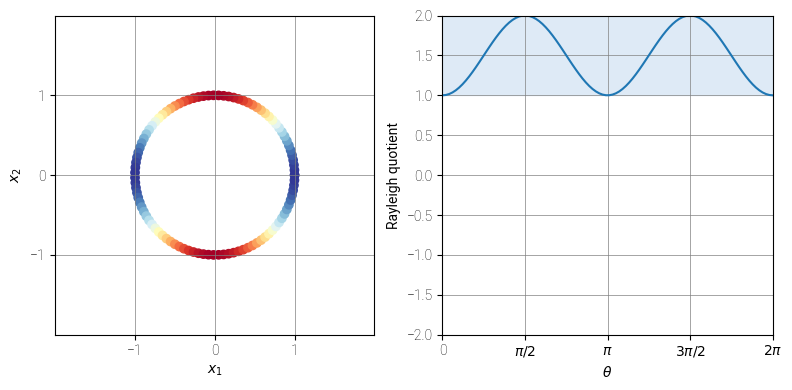

In [6]:
Q = np.array([[1,0],
              [0,2]])
print(np.linalg.eig(Q))
f_x1x2 = visualize(Q, '开口朝上正椭圆面_极坐标')
f_x1x2

(array([2., 1.]), array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))


0.5*sin(2*theta) + 1.5

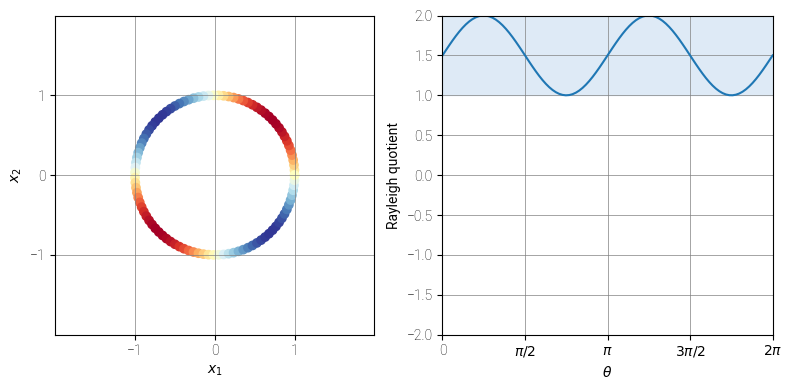

In [7]:
Q = np.array([[1.5,0.5],
              [0.5,1.5]])
print(np.linalg.eig(Q))
f_x1x2 = visualize(Q, '开口朝上旋转椭圆面_极坐标')
f_x1x2

(array([-1., -2.]), array([[1., 0.],
       [0., 1.]]))


cos(theta)**2 - 2

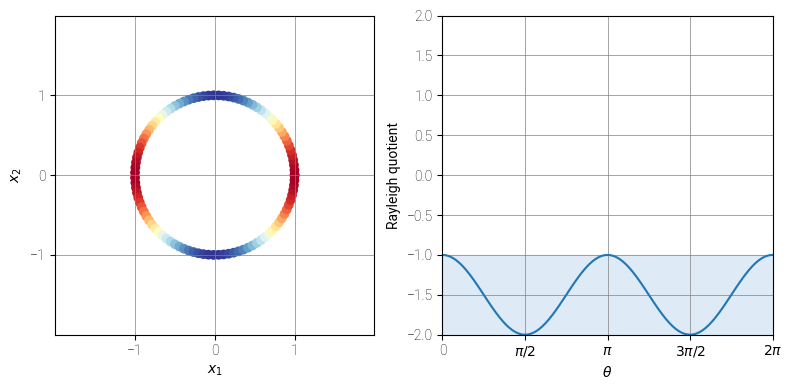

In [8]:
Q = np.array([[-1,0],
              [0,-2]])
print(np.linalg.eig(Q))
f_x1x2 = visualize(Q, '开口朝下正椭圆面_极坐标')
f_x1x2

(array([-1., -2.]), array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]]))


-0.5*sin(2*theta) - 1.5

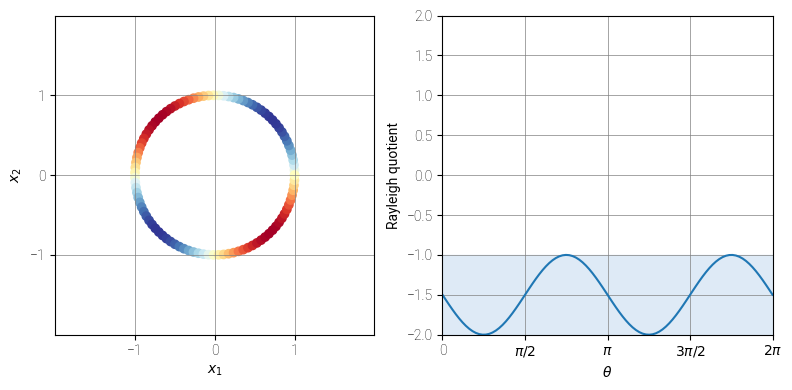

In [9]:
Q = np.array([[-1.5,-0.5],
              [-0.5,-1.5]])
print(np.linalg.eig(Q))
f_x1x2 = visualize(Q, '开口朝下旋转椭圆面_极坐标')
f_x1x2

(array([2., 0.]), array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]]))


1 - sin(2*theta)

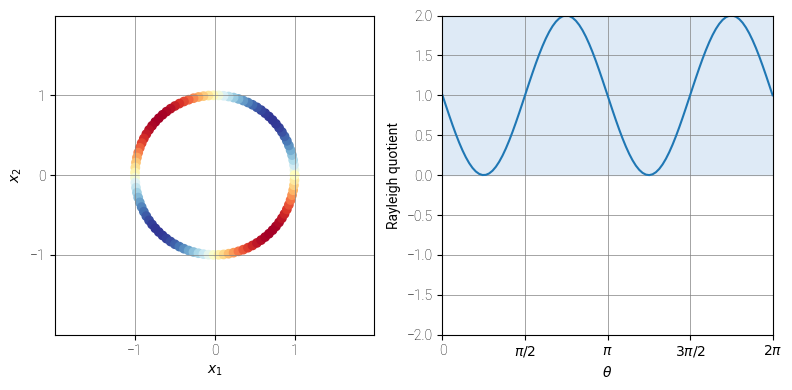

In [10]:
Q = np.array([[1,-1],
              [-1,1]])
print(np.linalg.eig(Q))
f_x1x2 = visualize(Q, '旋转山谷_极坐标')
f_x1x2

(array([ 0., -2.]), array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))


sin(2*theta) - 1

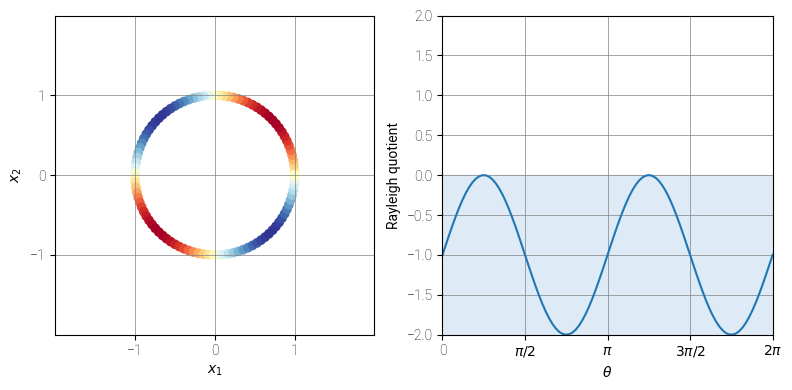

In [11]:
Q = np.array([[-1,1],
              [1,-1]])
print(np.linalg.eig(Q))
f_x1x2 = visualize(Q, '旋转山脊_极坐标')
f_x1x2

(array([ 1., -1.]), array([[1., 0.],
       [0., 1.]]))


cos(2*theta)

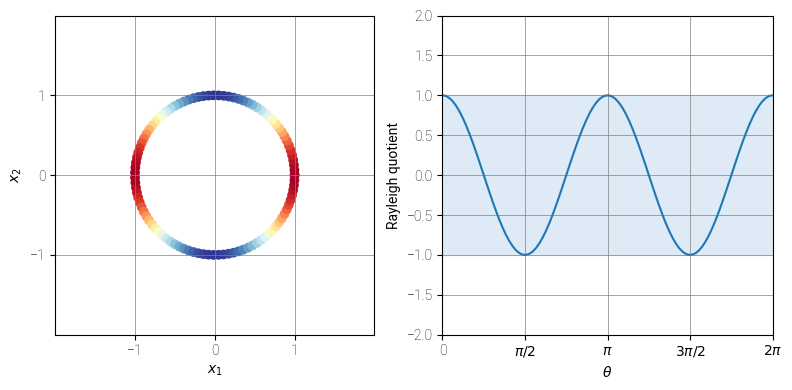

In [12]:
Q = np.array([[1,0],
              [0,-1]])
print(np.linalg.eig(Q))
f_x1x2 = visualize(Q, '双曲面_极坐标')
f_x1x2

(array([ 2., -2.]), array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))


2*sin(2*theta)

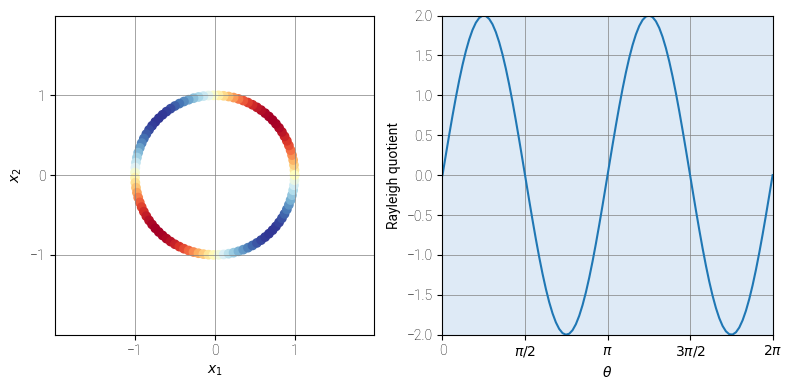

In [13]:
Q = np.array([[0,2],
              [2,0]])
print(np.linalg.eig(Q))
f_x1x2 = visualize(Q, '旋转双曲面_极坐标')
f_x1x2